# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [15]:
#Provide your code for part 1-1 here
# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert data to float32 for better memory efficiency 
X = X.astype('float32')


In [16]:
#Provide your code for part 1-2 here
# Print dataset dimensions and size
print("Dataset dimensions:", X.shape)
print("Total number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Get number of unique classes
num_classes = len(np.unique(y))
print("\nNumber of classes:", num_classes)
print("Classes:", np.unique(y))


Dataset dimensions: (70000, 784)
Total number of samples: 70000
Number of features: 784

Number of classes: 10
Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


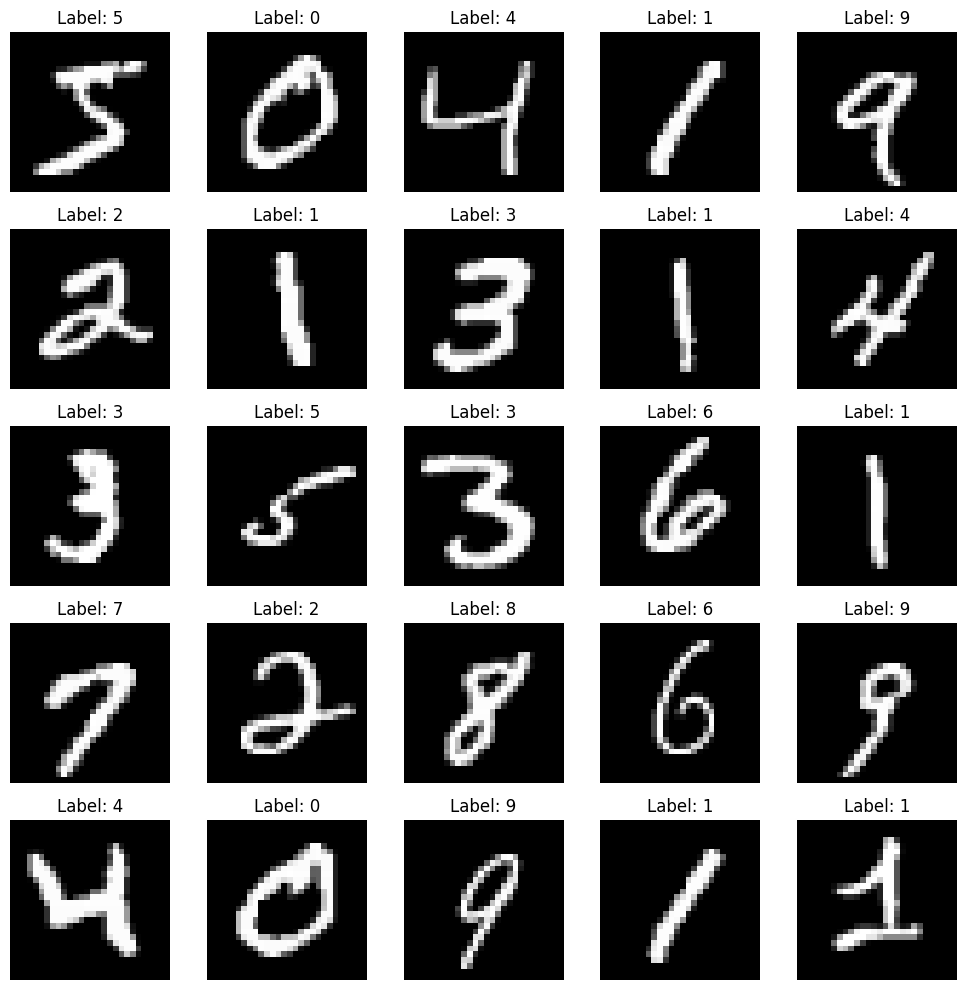

In [17]:
#Provide your code for part 1-3 here
# Create a figure with 5x5 subplots to display 25 sample digits
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    # Display the image
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [18]:
# Provide your code for part 2 here
# Scale pixel values to [0,1]
X = X / 255.0

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of resulting sets
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (56000, 784)
Test set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [20]:
# Provide your code for part 3-1 here
# Create and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on test set
lr_predictions = lr_model.predict(X_test_scaled)

# Calculate and print accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.9151


c:\Users\rhino\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Provide your code for part 3-2 here
# Create and train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), 
                        activation='relu',
                        solver='adam',
                        learning_rate_init=0.001,
                        random_state=42,
                        max_iter=1000)

nn_model.fit(X_train_scaled, y_train)

# Make predictions on test set
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate and print accuracy 
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")


Neural Network Test Accuracy: 0.9729


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


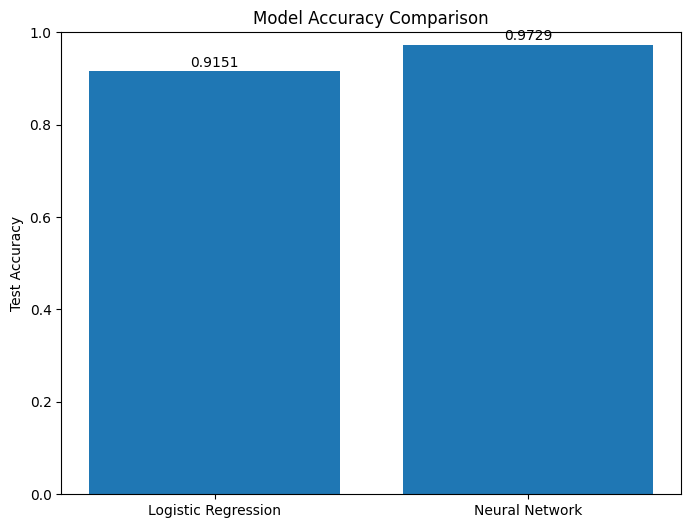

In [22]:
# Provide your code for part 4-1 here
# Create data for the bar plot
models = ['Logistic Regression', 'Neural Network']
accuracies = [lr_accuracy, nn_accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since accuracy is between 0 and 1
plt.title('Model Accuracy Comparison')
plt.ylabel('Test Accuracy')

# Add value labels on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.show()


In [23]:
# Provide your code for part 4-2 here
# Print classification report and confusion matrix for Logistic Regression
print("Logistic Regression Results:")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

print("\n" + "="*50 + "\n")

# Print classification report and confusion matrix for Neural Network
print("Neural Network Results:")
print("\nClassification Report:")
print(classification_report(y_test, nn_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))


Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.88      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.89      0.86      0.87      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000


Confusion Matrix:
[[1285    1   10    0    1   13   21    4    6    2]
 [   0 1552    6    9    3    7    0    4   16    3]
 [   6   18 1235   20   12   13   22   16   28   10]
 [   5   1

ValueError: cannot reshape array of size 784 into shape (8,8)

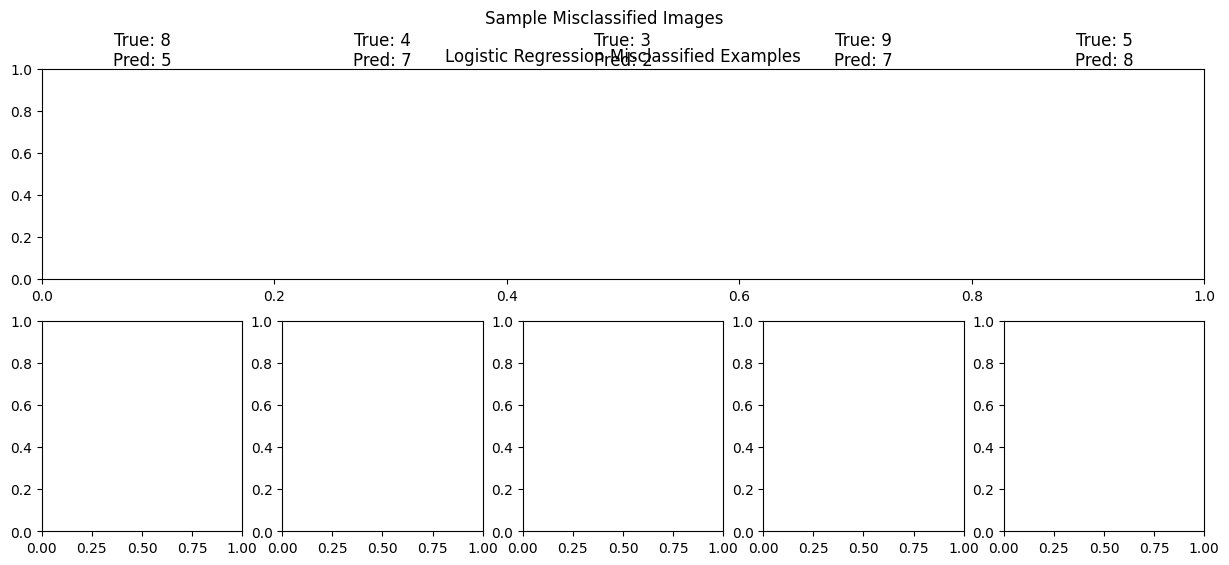

In [27]:
# Provide your code for part 4-3 here
# Find misclassified examples for both models
lr_misclassified = X_test[lr_predictions != y_test]
lr_misclassified_true = y_test[lr_predictions != y_test]
lr_misclassified_pred = lr_predictions[lr_predictions != y_test]

nn_misclassified = X_test[nn_predictions != y_test]
nn_misclassified_true = y_test[nn_predictions != y_test]
nn_misclassified_pred = nn_predictions[nn_predictions != y_test]

# Create figure with subplots
fig, axes = plt.subplots(2, min(5, len(lr_misclassified)), figsize=(15, 6))
fig.suptitle('Sample Misclassified Images')

# Plot misclassified examples for Logistic Regression
plt.subplot(2, 1, 1)
plt.title('Logistic Regression Misclassified Examples')
for i in range(min(5, len(lr_misclassified))):
    plt.subplot(2, 5, i+1)
    plt.imshow(lr_misclassified[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {lr_misclassified_true[i]}\nPred: {lr_misclassified_pred[i]}')
    plt.axis('off')

# Plot misclassified examples for Neural Network
for i in range(min(5, len(nn_misclassified))):
    plt.subplot(2, 5, i+6)
    plt.imshow(nn_misclassified[i].reshape(8, 8), cmap='gray')
    plt.title(f'True: {nn_misclassified_true[i]}\nPred: {nn_misclassified_pred[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print number of misclassified examples for each model
print(f"Number of misclassified examples (Logistic Regression): {len(lr_misclassified)}")
print(f"Number of misclassified examples (Neural Network): {len(nn_misclassified)}")


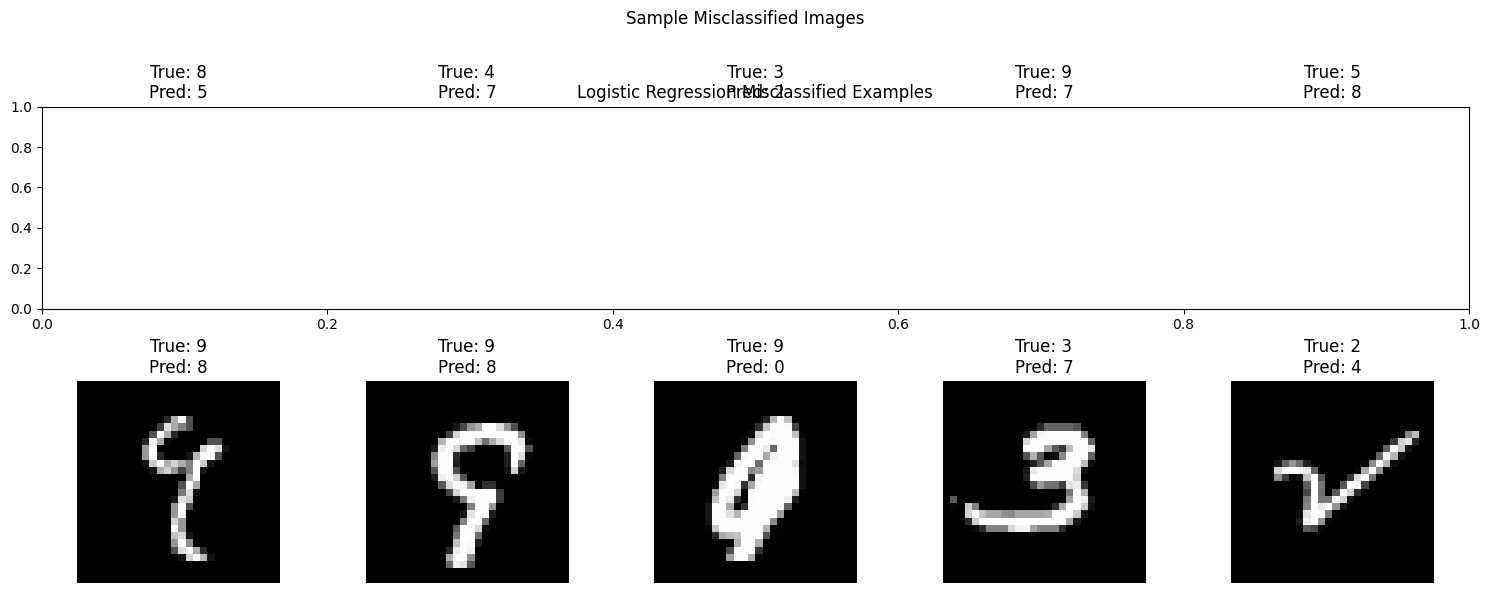

Number of misclassified examples (Logistic Regression): 1188
Number of misclassified examples (Neural Network): 380


In [28]:
# ... existing code for finding misclassified examples ...

# Create figure with subplots
fig, axes = plt.subplots(2, min(5, len(lr_misclassified)), figsize=(15, 6))
fig.suptitle('Sample Misclassified Images')

# Plot misclassified examples for Logistic Regression
plt.subplot(2, 1, 1)
plt.title('Logistic Regression Misclassified Examples')
for i in range(min(5, len(lr_misclassified))):
    plt.subplot(2, 5, i+1)
    plt.imshow(lr_misclassified[i].reshape(28, 28), cmap='gray')  # Correct shape: 28x28
    plt.title(f'True: {lr_misclassified_true[i]}\nPred: {lr_misclassified_pred[i]}')
    plt.axis('off')

# Plot misclassified examples for Neural Network
for i in range(min(5, len(nn_misclassified))):
    plt.subplot(2, 5, i+6)
    plt.imshow(nn_misclassified[i].reshape(28, 28), cmap='gray')  # Changed from 8x8 to 28x28
    plt.title(f'True: {nn_misclassified_true[i]}\nPred: {nn_misclassified_pred[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print number of misclassified examples for each model
print(f"Number of misclassified examples (Logistic Regression): {len(lr_misclassified)}")
print(f"Number of misclassified examples (Neural Network): {len(nn_misclassified)}")